In [1]:
import numpy as np
import os
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

train_path = '/home/kolegor/Code/VAS/data/nn_data/_train.txt'

In [2]:
def get_new_classes_features():
    X, Y = [], []
    with open(train_path, 'r') as inf:
        for i, line in enumerate(inf):
            if i > 0:
                y, x = line.split(',')
                Y.append(int(y))
                X.append(map(float, x.split(' ')[:-1]))
                
    pca = PCA(n_components=2)
    new_data = pca.fit_transform(X)
    
    other = [a for a, b in zip(new_data, Y) if b == 0]# and a[0] <= -4]
    mine = [a for a, b in zip(new_data, Y) if b == 1]# and a[0] <= -4]
    return (other, mine)

In [3]:
for class_data in get_new_classes_features():
    x = [a[0] for a in class_data]
    y_ = [a[1] for a in class_data]
    plt.plot(x, y_, 'o')

IOError: [Errno 2] No such file or directory: '/home/kolegor/Code/VAS/data/nn_data/_train.txt'

In [11]:
def separate_files(path='/home/kolegor/Code/VAS/data/wav_files_features/'):
    total_storage = []
    files_lengths = []
    classes = []
    names = []
    
    for folder in os.listdir(path):
        for filename in os.listdir(path + folder):
            with open(path + folder + '/' + filename, 'r') as inf:
                files_features = list(map(float, line.split(' ')[:-1]) for line in inf)
                total_storage.extend(files_features)
                files_lengths.append(len(files_features))
                classes.append(filename.split('.')[-2][-1])
                names.append(filename)
            
    pca = PCA(n_components=2)
    result = pca.fit_transform(total_storage)
    
    global_result = []
    now_start = 0
    for length in files_lengths:
        global_result.append(result[now_start:now_start + length])
        now_start += length
        
    print len(global_result), len(classes)
    return global_result, classes, names

In [12]:
features, classes, filenames = separate_files()

9 9


592 u audiobook_1_man_ru.features
368 n audiobook_5_man.features
648 n audiobook_8_man.features
593 n audiobook_7_man.features
127 g Denis big.features
1045 a Ilya.features
122 3 3.features
134 2 2.features
148 1 1.features


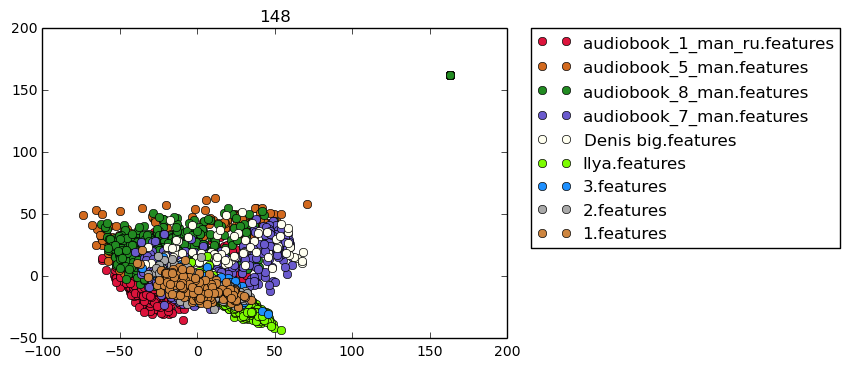

In [14]:
start = 36
count = len(classes)
saved = []

for file_features, class_, filename, color in sorted(zip(features, classes, filenames, colors.cnames.keys()[start:start + count]), key=lambda x: x[1], reverse=True):
    print len(file_features), class_, filename
    x = [a[0] for a in file_features]
    y_ = [a[1] for a in file_features]

    plt.plot(x, y_, 'o', color=color, label=filename)
    if class_ == '1':
        saved.append((x, y_))
        
    plt.title(len(file_features))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # plt.show()

67 set([-15.08594132311568, -15.085941323115584])
61 set([-15.08594132311568])
74 set([-15.08594132311568])


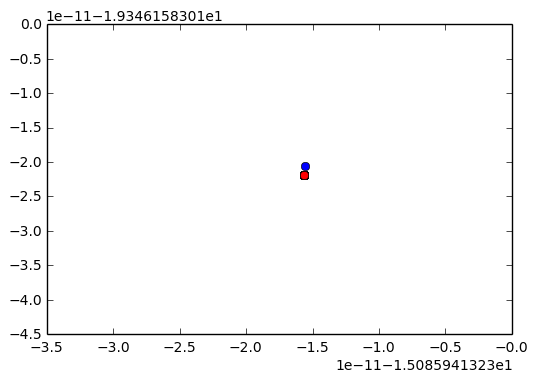

In [15]:
for x, y_ in saved:
    print len(x), set(x)
    plt.plot(x, y_, 'o')